In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('safe-driver-prediction/train.csv')
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [3]:
attributes=['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
        'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']

In [4]:
def correlation_heatmap(data):
    correlations = data.corr(method='pearson') # method{‘pearson’, ‘kendall’, ‘spearman’} 
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}, cmap='coolwarm')
    plt.show()

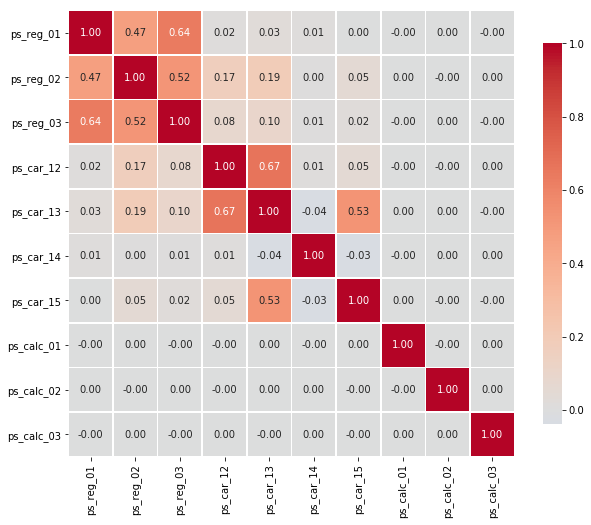

In [5]:
correlation_heatmap(df[attributes]) # ps_reg_01 & ps_reg_03 ,  ps_car_12 & ps_car_13 are highly correlated!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ea60780>,
      dtype=object)

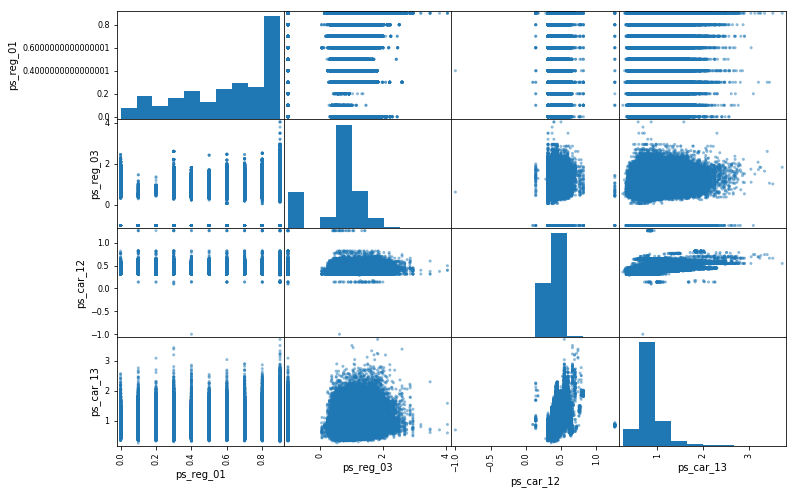

In [8]:
from pandas.plotting import scatter_matrix

attr_corr=['ps_reg_01' , 'ps_reg_03' ,  'ps_car_12' , 'ps_car_13']
scatter_matrix(df[attr_corr], figsize=(12, 8))

### 用相关系数r来描述，关于r的解读：
+ 正相关：如果x,y变化的方向一致，如登陆次数和商机用户的关系，r>0；
  一般地：
  + |r|>0.95 存在显著性相关；
  + |r|≥0.8 高度相关；
  + 0.5≤|r|<0.8 中度相关；
  + 0.3≤|r|<0.5 低度相关；
  + |r|<0.3 关系极弱，认为不相关
+ 负相关：如果x,y变化的方向相反，如吸烟与肺功能的关系，r<0；
+ 无线性相关：r=0。

In [ ]:
Pearson相关系数：对定距连续变量的数据进行计算。是介于-1和1之间的值，用于描述两组线性的数据一同变化移动的趋势

当两个变量的线性关系增强时，相关系数趋于1或-1；
当其中一个变量增大时，另一个变量也跟着增大，则两个变量正相关 ，相关系数大于0；
当其中一个变量增大时，另一个变量却跟着减小，则两个变量负相关，则相关系数小于0；
当两个变量的相关系数等于0时，则表明两个变量之间不存在线性相关关系）

In [ ]:
Spearman秩相关系数：是度量两个变量之间的统计相关性的指标，用来评估当前单调函数来描述俩个变量之间的关系有多好。

在没有重复数据的情况下，如果一个变量是另一个变量的严格单调函数，按摩二者之间的spearman秩相关系数就是1或+1 ，称为完全spearman相关
如果其中一个变量增大时，另一个变量也跟着增大时，则spearman秩相关系数时正的
如果其中一个变量增大时，另一个变量却跟着减少时，则spearman秩相关系数时负的
如果其中一个变量变化时候，另一个变量没有变化，spearman秩相关系为0
随着两个变量越来越接近严格单调函数时，spearman秩相关系数在数值上越来越大。

In [ ]:
Kendall相关系数：肯德尔相关系数是一个用来测量两个随机变量相关性的统计值。

一个肯德尔检验是一个无参数假设检验，它使用计算而得的相关系数去检验两个随机变量的统计依赖性。
肯德尔相关系数的取值范围在-1到1之间，
当τ为1时，表示两个随机变量拥有一致的等级相关性；
当τ为-1时，表示两个随机变量拥有完全相反的等级相关性；
当τ为0时，表示两个随机变量是相互独立的。

In [ ]:
1.两个连续变量间呈线性相关时，使用Pearson积差相关系数，
2.不满足积差相关分析的适用条件时，使用Spearman秩相关系数来描述.
3.Kendall’s tau-b等级相关系数：用于反映分类变量相关性的指标，适用于两个分类变量均为有序分类的情况。
对相关的有序变量进行非参数相关检验；取值范围[-1,1]，此检验适合于正方形表格；

4.计算积距pearson相关系数，连续性变量才可采用
5.计算Spearman秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据
6.计算Kendall秩相关系数，适合于定序变量或不满足正态分布假设的等间隔数据

7.当资料不服从双变量正态分布或总体分布未知，或原始数据用等级表示时，宜用spearman或kendall相关

8.Pearson: 积差相关 计算连续变量或是等间距测度的变量间的相关分析
9.Kendall: 等级相关 计算分类变量间的秩相关，适用于合并等级资料
10.Spearman: 等级相关 计算斯皮尔曼相关，适用于连续等级资料